`pip install scipy matplotlib colorama plotly`

In [1]:
import pandas
import scipy.signal as scipy
from matplotlib import pyplot as plt
from datetime import datetime
from time import time
from colorama import Fore
import seaborn as sns
import plotly.graph_objects as go

Przypisywanie nazwy znaczącym kolumnom. Jest to potrzebne ze względu na brak nagłówków w pliku `.csv`.

In [2]:
CSV_YEAR_COLUMN =   0
CSV_MONTH_COLUMN =  1
CSV_DATA_COLUMN =   3


Odczytanie danych z pliku

In [3]:
data = pandas.read_csv("dane.csv", sep=";", header=None)
print(data.head(10))

      0   1         2      3    4  5  6
0  1749   1  1749.042   96.7 -1.0 -1  1
1  1749   2  1749.123  104.3 -1.0 -1  1
2  1749   3  1749.204  116.7 -1.0 -1  1
3  1749   4  1749.288   92.8 -1.0 -1  1
4  1749   5  1749.371  141.7 -1.0 -1  1
5  1749   6  1749.455  139.2 -1.0 -1  1
6  1749   7  1749.538  158.0 -1.0 -1  1
7  1749   8  1749.623  110.5 -1.0 -1  1
8  1749   9  1749.707  126.5 -1.0 -1  1
9  1749  10  1749.790  125.8 -1.0 -1  1


<AxesSubplot:>

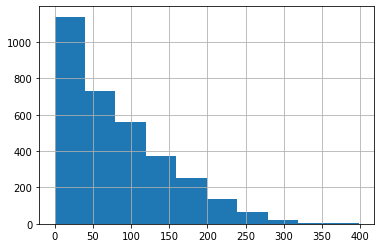

In [4]:
data[CSV_DATA_COLUMN].hist()

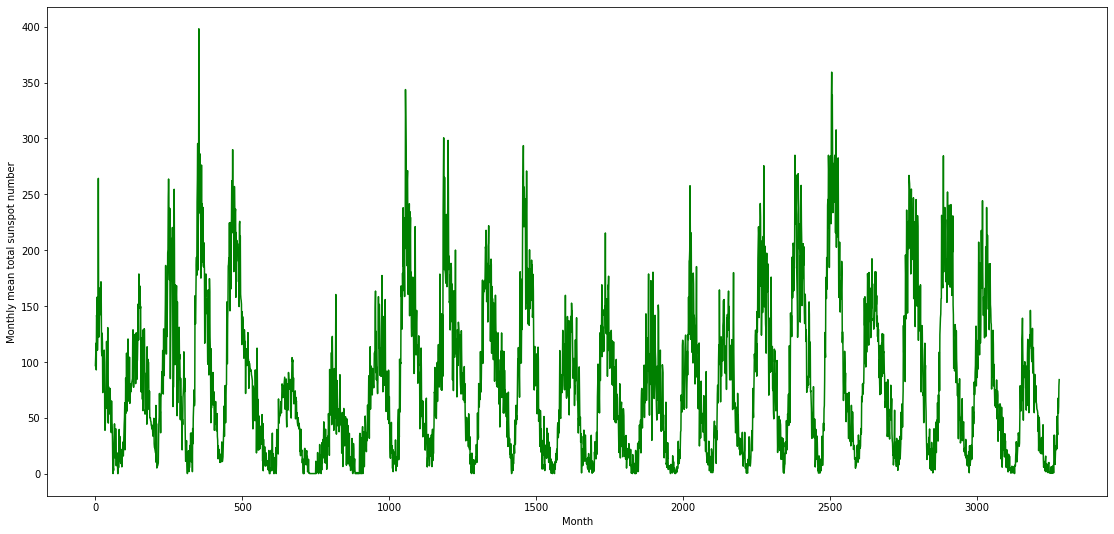

In [5]:
plt.figure(figsize=(19,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.plot(data[CSV_DATA_COLUMN], c="green")


<AxesSubplot:>

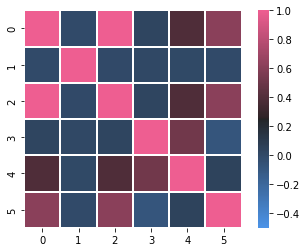

In [6]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5 , cmap=cmap, square=True, linewidths=.2)

In [7]:
peaks = scipy.find_peaks(data[CSV_DATA_COLUMN], height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)

In [64]:
# time_series = data[CSV_DATA_COLUMN]

time_series = data[CSV_DATA_COLUMN].mul(-1.0)

indices = scipy.find_peaks(time_series, width=24, distance=34, prominence=30)[0]
time_series = data[CSV_DATA_COLUMN]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))


fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
    ),
    name='Detected Minimum'
))

fig.show()